# Playing with pedigrees

In [203]:
import msprime
import tskit
import numpy as np
import io

In [113]:
nGens = 2
N = 500
samp = 1

In [114]:
np.array(range(0,2))

array([0, 1])

In [115]:
def genIndRange(gen, N):
    """
    Generate a range of possible parents depending on N and generation.
    """
    return np.array(range(gen*N, (gen+1)*N))

In [121]:
def parentIndOffset(N, nSamp):
    """
    Generate a range of parent id offsets (sampling with replacement
    """
    # random nums
    nums = np.random.choice(np.arange(N), nSamp, replace=True)
    #print(nums)
    ss = set(nums)
    ids = np.zeros(len(nums), dtype=np.int32)
    c = 1
    for i in ss:
        
        ids[nums == i] = c
        c +=1
    return ids

In [142]:
a = parentIndOffset(N=7, nSamp=5)

In [144]:
a.copy()

array([3, 4, 2, 1, 1], dtype=int32)

In [257]:
def makePed(numG,N, nInds):
    """
    Make a pedigree by recurrently smapling parents from past generations
    """
    idCounter=0
    currentT=0
    ids=[]
    t=[]
    mums=[]
    dads=[]
    for g in range(numG): # the generation loop

        if g > 0: # any other than 1st gen
            #print(f"Gen {g}")
            currInds = np.unique(pp)
            pp = parentIndOffset(N, len(currInds)*2) + max(currInds)
            
            for i in range(len(currInds)):
                ids.append(currInds[i])
                t.append(currentT)
                if g < numG - 1:
                    mums.append(pp[i*2])
                    dads.append(pp[i*2-1])
                else:
                    mums.append(".")
                    dads.append(".")
            
        else: #only in 1st gen
            #print("1st gen")
            pp = parentIndOffset(N, nInds*2) + nInds - 1 # parents of those inds
            for i in range(nInds):
                ids.append(i)
                mums.append(pp[i*2])
                dads.append(pp[i*2-1])
                t.append(currentT)
                
        # each generation
        currentT += 1
    
    aa = "# id parent0 parent1 time\n" 
    for i,j,k,l in zip(ids, mums, dads, t):
        aa += f"{i} {j} {k} {l}\n"
    return aa
    
    

In [304]:
aa=makePed(200, 100, 2)
#print(aa)

In [305]:
tc.sort()

In [306]:
tc = msprime.parse_pedigree(io.StringIO(aa), sequence_length=100)


In [316]:
ts = msprime.sim_ancestry(
    initial_state=tc,
    model="fixed_pedigree"
)

In [317]:
ts

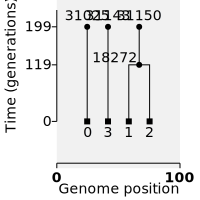

In [318]:
ts.draw_svg(y_axis=True)

In [20]:
ped = msprime.PedigreeBuilder(individuals_metadata_schema=tskit.MetadataSchema.permissive_json())

In [21]:
ped

In [18]:
?ped.add_individual

Signature:
ped.add_individual(
    *,
    time,
    is_sample=None,
    parents=None,
    population=None,
    metadata=None,
) -> 'int'
Docstring:
Adds an individual with the specified properties, returning its ID.

:param float time: The time for this individual measured in generations ago.
:param bool is_sample: If True, the new individual is marked as a sample;
    if False, the individual is not marked as a sample. If None (the default)
    the individual is marked as a sample if its ``time`` is zero.
    Parent IDs are not checked, and may refer to individuals not yet
    added to the tables.
:param list(int) parents: The integer IDs of the specified individual's
    parents. Exactly two parents must be specified. If None (the default),
    the individual is treated as a founder by setting its parents to
    ``[-1, -1]``.
:param str|int population: The population to associated with this
    individual. The value can be a string or integer, following the
    usual
    :ref:`popula